<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SPRT" data-toc-modified-id="SPRT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://en.wikipedia.org/wiki/Sequential_probability_ratio_test" target="_blank">SPRT</a></a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Решение" data-toc-modified-id="Решение-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Решение</a></span><ul class="toc-item"><li><span><a href="#Формулы" data-toc-modified-id="Формулы-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Формулы</a></span><ul class="toc-item"><li><span><a href="#The-next-step" data-toc-modified-id="The-next-step-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>The next step</a></span></li><li><span><a href="#The-stopping-rule" data-toc-modified-id="The-stopping-rule-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>The stopping rule</a></span></li><li><span><a href="#Formulas" data-toc-modified-id="Formulas-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Formulas</a></span></li></ul></li></ul></li><li><span><a href="#Константы" data-toc-modified-id="Константы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Константы</a></span></li><li><span><a href="#Код" data-toc-modified-id="Код-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Код</a></span></li><li><span><a href="#Эксперименты" data-toc-modified-id="Эксперименты-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Эксперименты</a></span></li><li><span><a href="#Поменяем-доли-компонент-в-смеси" data-toc-modified-id="Поменяем-доли-компонент-в-смеси-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Поменяем доли компонент в смеси</a></span></li><li><span><a href="#Оценим-средний-объём-выборки." data-toc-modified-id="Оценим-средний-объём-выборки.-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Оценим средний объём выборки.</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
%matplotlib inline

## [SPRT](https://en.wikipedia.org/wiki/Sequential_probability_ratio_test)

[Видео с объяснением](https://www.youtube.com/watch?v=4NYbTUIkBbU&index=4&list=PLlb7e2G7aSpRG_Ve6kuxc9Biuwyf42kJx) (начало 1:06:20) 

### Задача 
* Создайте синтетические данные полученные путем смешивания 2 выборок из нормально распределеных СВ с разными матожиданиями, но одинаковыми дисперсиями
* Примените к сгенерированным данным последовательный критерий Вальда силы $(\alpha, \beta)$ (критерий Вальда должен быть реализован самостоятельно). Для этого:
    * Задайте нулевую и альтернативную гипотезы о равенствах матожиданий конкретным величинам
    * Задайте $\alpha, \beta$
    * Выпишите формулы аппроксимации границы
    * Провести эксперимент
    * Результат эксперимента отобразить на графике
* Проанализируйте поведение критерия при разных долях компонент в смеси
* Какой объем выборок в среднем требуется для принятия решения?

### Решение 

#### Формулы

$$H_0: m = m_2  \quad  H_1: m = m_1$$

##### The next step
$$S_i = S_{i-1} + log(\Lambda_i), \quad S_0 = 0$$

##### The stopping rule
$$a < S_i < b \rightarrow continue$$
$$S_i \geq b \rightarrow Accept \quad H_1$$
$$S_i \leq a \rightarrow Accept \quad H_0$$

##### Formulas

$$ a=log(\frac{\beta}{1-\alpha}) \quad \quad b=log(\frac{1-\beta}{\alpha})$$

$$f(x, m) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{(x-m)^2}{2\sigma^2}}$$

$$ log(\Lambda_i) = log(\frac{f(x,m_1)}{f(x,m_2)}) = \frac{m_1-m_2}{\sigma^2} x - \frac{m_1^2-m_2^2}{2\sigma^2}$$
$$a < S_i < b \rightarrow \frac{a \sigma^2}{m_1-m_2} + \frac{n(m_1+m_2)}{2} < \sum_{i=1}^n x_i < \frac{b \sigma^2}{m_1-m_2} + \frac{n(m_1+m_2)}{2} $$

### Константы


In [3]:
mean_first = 0.0
mean_second = 5.0
V = 10000
sigma = 1.0

### Код

In [4]:
def cryteria(s, lower, upper):
    if s >= upper:
        return 'Accept H1'
    elif s <= lower:
        return 'Accept H0'
    return 'Continue'


def recalculate_boundaries(bound, m1, m2, sigma, n):
    return (sigma ** 2 * bound / (m1-m2)) + n * (m1+m2) / 2


def SPRT(values_generator, m1, m2, sigma, alpha, betta):
    a = np.log(betta / (1-alpha))
    b = np.log((1-betta) / alpha)
    S = []
    boundaries_array = []
    for n, x in values_generator:
        S.append(x)
        boundaries = recalculate_boundaries(np.array([a, b]), m1, m2, sigma, n)
        boundaries_array.append(boundaries)
        result = cryteria(sum(S), *boundaries)
        
        if result != 'Continue':
            break

    b = list(zip(*boundaries_array))  
    data = pd.DataFrame(data={'lower': b[0], 'Sn': np.cumsum(S), 'upper': b[1]})
    return result, data 
    

### Эксперименты

In [5]:
def experiment(h0, h1, alpha, betta, k_first, k_second, is_plot=True):
    first = np.random.normal(mean_first, sigma, int(k_first * V))
    second = np.random.normal(mean_second, sigma, int(k_second * V))

    distr = np.concatenate([first, second])
    if is_plot:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(15, 5)
        pd.Series(distr).hist(bins=100)

    status, data = SPRT(enumerate(distr, 1), h1, h0, sigma, alpha, betta)
    if is_plot:
        ax1.plot(data)
        print('result = {}'.format(status))
    
    return data.transpose()

result = Accept H0


,0,1,2
Sn,-1.156693,-2.377725,-3.266869
lower,-5.406755,-3.906755,-2.406755
upper,8.406755,9.906755,11.406755


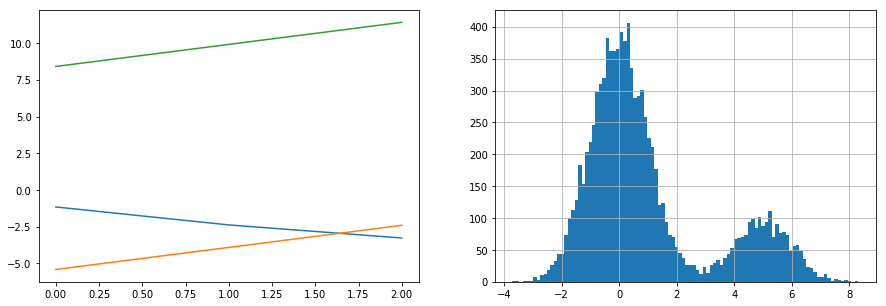

In [6]:
alpha = 0.001 # P{H1/H0} - вероятность ошибки  первого рода (отвергнуть истинную)
betta = 0.001 # P{H0/H1} - вероятность ошибки  второго рода (принять ложную)

k_first, k_second = 0.8, 0.2

h1 = 2.0
h0 = 1.0

experiment(h0, h1, alpha, betta, k_first, k_second)

Математическое ожидание смеси = $0.8 * 0.0 + 0.2 * 0.5 = 1.0$, Нулевая гипотеза верна, что и показал критерий. Попробуем увеличить вероятность совершить ошибку второго рода, т.е. ошибочно принять нулевую гипотезу.

result = Accept H0


,0,1
Sn,0.778032,-0.907116
lower,-0.947893,-0.697893
upper,2.992585,3.242585


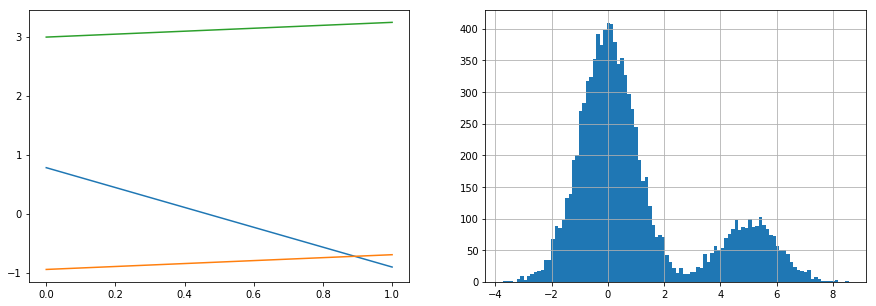

In [7]:
alpha = 0.001 # P{H1/H0} - вероятность ошибки  первого рода (отвергнуть истинную)
betta = 0.05 # P{H0/H1} - вероятность ошибки  второго рода (принять ложную)

k_first, k_second = 0.8, 0.2

h1 = 1.5
h0 = -1.0

experiment(h0, h1, alpha, betta, k_first, k_second)

Как и ожидалось, врезультате эксперимента мы ошибочно отклонили нулевую гипотезу о равенсве мат ожидания значению -1.0.

### Поменяем доли компонент в смеси

Рассмотрим смесь состояющую из равных долей компонент. Математическое ожидание смеси равно 2.5. Проверим критерий при таких данных.

result = Accept H0


,0,1,2,3,4,5,6,7,8
Sn,-1.070591,-0.370639,-0.198758,-0.827463,-0.040523,0.348825,0.529470,-0.262419,-2.106614
lower,-1.381351,-1.381351,-1.381351,-1.381351,-1.381351,-1.381351,-1.381351,-1.381351,-1.381351
upper,1.381351,1.381351,1.381351,1.381351,1.381351,1.381351,1.381351,1.381351,1.381351


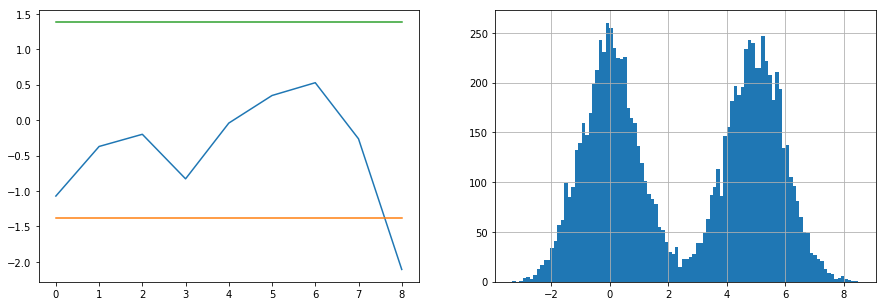

In [8]:
alpha = 0.001 # P{H1/H0} - вероятность ошибки  первого рода (отвергнуть истинную)
betta = 0.001 # P{H0/H1} - вероятность ошибки  второго рода (принять ложную)

k_first, k_second = 0.5, 0.5

h1 = 2.5
h0 = -2.5

experiment(h0, h1, alpha, betta, k_first, k_second)

### Оценим средний объём выборки.

Оценим средний объём выборки, после которого можно принять решение в случае справедливости нулевой гипотезы.

100%|██████████| 10000/10000 [00:16<00:00, 592.49it/s]


5.2845

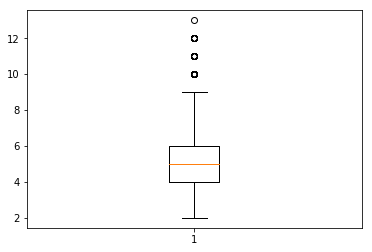

In [9]:
alpha = 0.001 # P{H1/H0} - вероятность ошибки  первого рода (отвергнуть истинную)
betta = 0.001 # P{H0/H1} - вероятность ошибки  второго рода (принять ложную)

k_first, k_second = 0.8, 0.2

h1 = 2.0
h0 = 1.0

num_elements = [len(experiment(h0, h1, alpha, betta, k_first, k_second, False).columns) for _ in tqdm(range(10000))]
plt.boxplot(num_elements)
np.mean(num_elements)

По результатам моделирования можно сделать вывод о том, что в среднем около пяти элементов требуется, чтобы принять решение в соответствии с критерием Вальда, однако иногда количество необходимых элементов сильно больше, о чём свидетельствуют выбросы.